<a href="https://colab.research.google.com/github/RobinTeotia/LinearModels_Project/blob/main/Project_LinearModel_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-processing

In [255]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from google.colab import files
import io
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pp
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', 500)


In [257]:
#file = files.upload()


In [258]:
#Reading the file
path="/content/drive/MyDrive/Linear_Model_Project/auto_clean.csv"
df=pd.read_csv(path)
df.head()
#df = pd.read_csv(io.StringIO(file['auto_clean.csv'].decode('latin-1')))
#df_raw = df
#df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [259]:
df.describe(include= "all")

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [260]:
# Looking the columns of the data
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [262]:
#number of rows and columns in the data
df.shape


(201, 29)

In [263]:
df = pd.get_dummies(df)

In [264]:
features_name=df.columns.to_list()

In [265]:
df.dropna(inplace=True)# group by make/company then average
df.shape

(197, 79)

In [266]:
x = df.drop(['price'],axis=1)
y = df['price']

In [267]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Multiple Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

# Algorith Performance
y_pred = reg.predict(x_test)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))
print("r2 train: ", metrics.r2_score(y_train,y_pred_train))
print("MSE train:", metrics.mean_squared_error(y_train,y_pred_train))
print("coef:",reg.coef_)
#1.95956218e+02
#-6.34848771e+02

slope: -824.4483442102446
intercept 199.98922600047445
r2:  0.9303454746172529
mean square error:  4346166.515350741
r2 train:  0.9757084606041299
MSE train: 1561489.3708596574
coef: [-8.24448344e+02 -1.68531870e+01  1.95956218e+02 -2.53341824e+04  1.20630147e+04 -6.34848771e+02  1.10862136e+01  9.53943901e+01 -5.40448991e+03  1.03124775e+03 -6.07861438e+02 -1.06923591e+02  3.24793735e+00  2.90095359e+02  8.33175570e+01  1.45508372e+03  1.73462240e+03 -1.73462240e+03  1.14953007e+03  6.60181824e+03  8.41791474e+03 -4.01577774e+03 -4.38536204e+03 -3.02378779e+03 -5.42453037e+03 -5.65353466e+03  8.09856425e+02  6.07543895e+03  5.13306398e+02 -3.76354629e+03 -4.18226368e+02 -4.92396858e+03 -4.81404227e+03  9.67805000e+03 -9.56149156e+02  5.94296308e+03 -1.19032846e+03 -1.29033730e+03  1.28701839e+03 -6.16305263e+02 -1.63770297e+03  1.63770297e+03 -2.67677578e+02  2.67677578e+02  2.23371145e+03  5.96761441e+02 -1.16966469e+03 -4.14640936e+02 -1.24616727e+03 -2.96478789e+02 -7.55232415e+02 

In [269]:
from statsmodels.api import OLS
OLS(y_train,x_train).fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning:

invalid value encountered in true_divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     64.27
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           2.09e-57
Time:                        11:59:50   Log-Likelihood:                -1342.3
No. Observations:                 157   AIC:                             2807.
Df Residuals:                      96   BIC:                             2993.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
symboling                 -824.4483    288.869     -2.854      0.005   -1397.849    -251.048
normalized-losses          -16.8532      8.285     -2.034      0.045     -33.299      -0.407
wheel-base                 195.9562     98.906      1.981      0.050      -0.371     392.283
length                   -2.533e+04   1.19e+04     -2.123      0.036    -4.9e+04   -1644.433
width                     1.206e+04   1.97e+04      0.612      0.542   -2.71e+04    5.12e+04
height                    -634.8488    193.406     -3.282      0.001   -1018.757    -250.941
curb-weight                 11.0862      2.469      4.491      0.000       6.186      15.986
engine-size                 95.3944     27.876      3.422      0.001      40.060     150.728
bore                     -5404.4899   1961.460     -2.755      0.007   -9297.957   -1511.023
stroke                    1031.2477   1232.025      0.837      0.405   -1414.303    3476.798
compression-ratio         -607.8614    541.148     -1.123      0.264   -1682.032     466.309
horsepower                -106.9236     36.454     -2.933      0.004    -179.284     -34.563
peak-rpm                     3.2479      0.847      3.837      0.000       1.568       4.928
city-mpg                   290.0954    191.132      1.518      0.132     -89.299     669.490
highway-mpg                 83.3176    128.601      0.648      0.519    -171.954     338.589
city-L/100km              1455.0837    496.258      2.932      0.004     470.020    2440.147
diesel                    1756.4895   3820.699      0.460      0.647   -5827.539    9340.518
gas                      -1698.1772   4022.310     -0.422      0.674   -9682.398    6286.044
make_alfa-romero          1152.6023   1797.475      0.641      0.523   -2415.358    4720.562
make_audi                 6604.8905   1870.386      3.531      0.001    2892.204    1.03e+04
make_bmw                  8420.9870   1705.446      4.938      0.000    5035.703    1.18e+04
make_chevrolet           -4012.7055   1814.125     -2.212      0.029   -7613.714    -411.697
make_dodge               -4382.2898    961.067     -4.560      0.000   -6289.992   -2474.588
make_honda               -3020.7156   1923.069     -1.571      0.120   -6837.978     796.547
make_isuzu               -5421.4581   2025.586     -2.676      0.009   -9442.215   -1400.701
make_jaguar              -5650.4624   3045.490     -1.855      0.067   -1.17e+04     394.787
make_mazda                 812.9287    802.182      1.013      0.313    -779.389    2405.246
make_mercedes-benz        6078.5112   1953.417      3.112      0.002    2201.009    9956.013
make_mercury               516.3786   2370.108      0.218      0.828   -4188.248    5221.005
make_mitsubishi          -3760.4741    939.491     -4.003      0.000   -5625.348   -1895.600
make_nissan   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



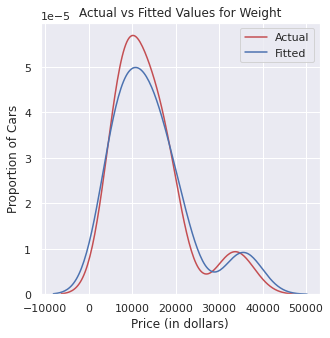

In [270]:
#Plotting the actual and the predicted values.
width = 5
height = 5
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.gca().legend(("Actual","Fitted"))
plt.title('Actual vs Fitted Values for Weight')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

array([[1.        , 0.59038257],
       [0.59038257, 1.        ]])

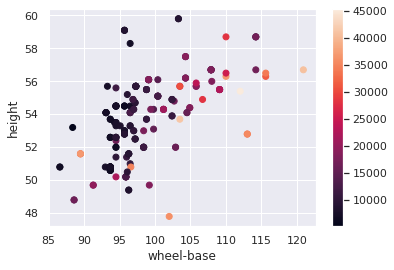

In [271]:
plt.scatter(df['wheel-base'],df['height'], c= df['price'])
plt.xlabel("wheel-base")
plt.ylabel("height")
plt.colorbar()

slctd_features = ['height', 'curb-weight', 'engine-size', 'horsepower', 'engine-type_ohc']

np.corrcoef(df['height'], df['wheel-base'])

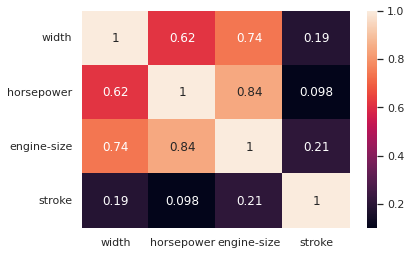

In [272]:
import seaborn as sn
import matplotlib.pyplot as plt
df1 = df[['width','horsepower','engine-size' , 'stroke']]
corrmatrix = df1.corr()
sn.heatmap(corrmatrix, annot=True)
sn.set(rc={'figure.facecolor': 'white'})
plt.show()

#RFE

In [273]:
input=df.describe().columns.to_list()# saving all the columns
var=df[input]
var=var.drop(['price'],axis=1)# taking all predictors.
x=var.values
y=df['price'].values # defining target

In [274]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Train/test set generation
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1121218
)

# Scale train and test sets with StandardScaler
X_train_std = pp.StandardScaler().fit_transform(X_train)
X_test_std = pp.StandardScaler().fit_transform(X_test)

# Fix the dimensions of the target array
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)



In [275]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
import matplotlib.pyplot as plt

regr_1 = DecisionTreeRegressor(criterion='mse',max_depth=2)
regr_1.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



DecisionTreeRegressor(criterion='mse', max_depth=2)

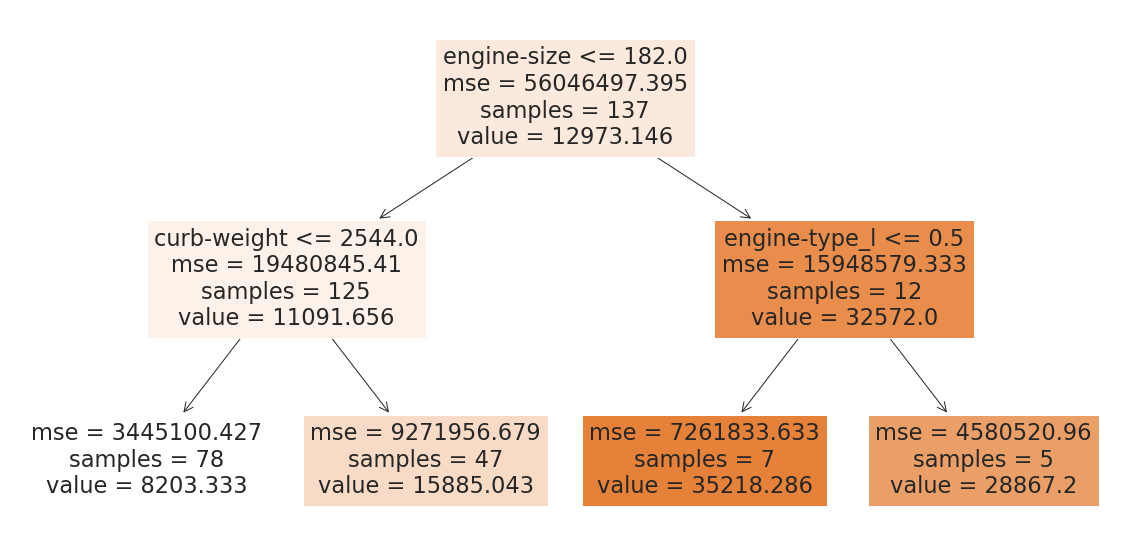

In [277]:
plt.figure( figsize=(20,10) )
_ = tree.plot_tree( regr_1,
               feature_names = features_name,
               #class_names = Class_names,
               filled = True)
plt.savefig('tree.png')

In [227]:
# Init, fit, test Lasso Regressor
#forest = RandomForestRegressor()
forest=DecisionTreeRegressor()
_ = forest.fit(X_train_std, y_train)
forest.score(X_test_std, y_test)

0.7251439562775075

In [228]:
#Printing the features and Weight.
pd.DataFrame(
    zip(var.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,make_volkswagen,0.000000e+00
1,body-style_hardtop,0.000000e+00
2,make_isuzu,0.000000e+00
3,make_jaguar,0.000000e+00
4,engine-type_dohc,0.000000e+00
5,engine-location_rear,0.000000e+00
6,engine-location_front,0.000000e+00
7,make_nissan,0.000000e+00
8,make_peugot,0.000000e+00
9,engine-type_ohcf,0.000000e+00


In [229]:
#Listing the best features.
import random
random.seed(10)
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeRegressor(),#RandomForestRegressor(), 
          n_features_to_select=5, step=5)
_ = rfe.fit(X_train_std, y_train)

print(var.columns[rfe.support_])
slctd_features=var.columns[rfe.support_].to_list()# BMW is an outlier

slctd_features = ['height', 'curb-weight', 'engine-size', 'horsepower', 'engine-type_ohc']

Index(['height', 'curb-weight', 'engine-size', 'make_bmw', 'engine-type_ohc'], dtype='object')


In [230]:
slctd_features

['height', 'curb-weight', 'engine-size', 'horsepower', 'engine-type_ohc']

In [231]:
x = df[slctd_features]
if "engine-type_ohc" in slctd_features: slctd_features.remove("engine-type_ohc")



In [232]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train_std = pp.StandardScaler().fit_transform(x_train)
X_test_std = pp.StandardScaler().fit_transform(x_test)

In [233]:
reg.fit(X_train_std, y_train)
#print(x_train)
print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)
# Algorith Performance
y_pred = reg.predict(X_test_std)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))
#print(X_train_std[:,0:4])
reg1 = LinearRegression()
#reg1.fit(x_train[["horsepower","engine-size"]], y_train)
reg1.fit(X_train_std[:,0:4], y_train)
y_pred1 = reg1.predict(X_test_std[:,0:4])

print("slope:", reg1.coef_[0])
print("intercept", reg1.intercept_)

print("r2: ", metrics.r2_score(y_test,y_pred1))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred1))
print(reg1.coef_)
#common_list
#Output suggets that the categorical variable made  difference to the output, still there is a difference se slope and mse reduced very lightly.

slope: 664.6731775928747
intercept 13013.71974522293
r2:  0.7533998811126922
mean square error:  15386870.752478028
slope: 660.174758178654
intercept 13013.71974522293
r2:  0.7458124619718975
mean square error:  15860295.656695683
[ 660.17475818 2114.31858025 4310.90916406 1099.57825343]


#PCA

In [234]:
#x = df.drop(['price'],axis=1)
x = df[slctd_features]
y = df['price']
#nikita_x = df[slctd_features]
#nikita_y = df['price']
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# Scale train and test sets with StandardScaler
X_train_std = std.fit_transform(x_train) #Why this? Robin--for scaling for the features
X_test_std = std.fit_transform(x_test) #Why this? Robin-----for scaling of the features
x_train_slctd_featured = X_train_std
#x = df[common_list]
x_train_raw = X_train_std

#X_train_std

#we need to scale the variables x_train and y_train.

In [235]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_slctd_featured[:,0:4])
pca1 = PCA()
pca1.fit(x_train_slctd_featured)
x_train = pca.transform(x_train_slctd_featured[:,0:4])
x_train_raw = pca1.transform(x_train_slctd_featured)

x_test = pca.transform(X_test_std[:,0:4])
x_test_raw = pca1.transform(X_test_std)


In [236]:
print(pca.components_)
pca.explained_variance_ratio_

[[ 0.12047994  0.58158142  0.58160307  0.55586465]
 [-0.95040545 -0.14830589  0.10325221  0.25312806]
 [ 0.2020481  -0.29631596 -0.49933837  0.78869171]
 [ 0.20344685 -0.74294365  0.63382809  0.07004331]]


array([0.67416507, 0.26308798, 0.03974515, 0.02300179])

In [237]:
len(pca.components_)

4

In [238]:
#print(np.round(pca.explained_variance_ratio_,4))
import plotly.express as px

x_train_max_var = x_train[:,0:2]
x_test_max_var = x_test[:,0:2]

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    x_train_max_var,
    labels=labels,
    dimensions=range(2)
   # ,c = 
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [239]:
#Linear regression between PCA loading and y

#x_train_new = pd.DataFrame(x_train)
#print(x_train[:,0:2])
#x_train_new = x_train_new.rename(columns={0: 'PCA1', 1: 'PCA2', 2: 'PCA3', 3: 'PCA4'}) 
##print(x_train_new.columns)
reg_all_pca = LinearRegression()
reg_all_pca.fit(x_train[:,0:2], y_train)

print("slope:", reg_all_pca.coef_[0])
print("intercept", reg_all_pca.intercept_)

y_pred_all_pca = reg_all_pca.predict(x_test[:,0:2])
print("r2: ", metrics.r2_score(y_test,y_pred_all_pca))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred_all_pca))

#print(x_test)

slope: 4427.6408831859335
intercept 13013.71974522293
r2:  0.7494223746503057
mean square error:  15635051.402714675


(157, 4)
(157, 1)


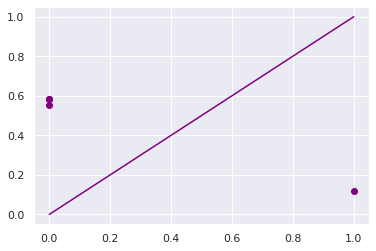

In [240]:
#Linear regression between raw variables and pc1.

reg_all_new = LinearRegression()
reg_all_new.fit(x_train_raw[:,0:4], x_train[:,0:1])
print(x_train_raw[:,0:4].shape)
print(x_train[:,0:1].shape)


#print(pca.components_)
plt.scatter(reg_all_new.coef_,pca.components_[0],c='purple')
x=[0,1]
y=[0,1]
plt.plot(x,y,c="purple")
#print(reg_all_new.coef_)
#reg_all_new.coef_= reg_all_new.coef_.str.split(" ", n = 1, expand = True) 



#PLS

In [241]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=4)

In [242]:

pls.fit(X_train_std, y_train)
y_pred = pls.predict(X_test_std)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))

r2:  0.7458124619718973
mean square error:  15860295.656695694


In [243]:
n=list(range(1,15))
r=[]
mse=[]
for i in n:
  pls = PLSRegression(n_components=i)
  pls.fit(X_train_std, y_train)
  y_pred = pls.predict(X_test_std)
  r.append(metrics.r2_score(y_test,y_pred))
  mse.append(metrics.mean_squared_error(y_test,y_pred))
  #print("r2: ", metrics.r2_score(y_test,y_pred))
  #print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning:

As of version 0.24, n_components(5) should be in [1, n_features].n_components=4 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning:

As of version 0.24, n_components(6) should be in [1, n_features].n_components=4 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning:

As of version 0.24, n_components(7) should be in [1, n_features].n_components=4 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning:

As of version 0.24, n_components(8) should be in [1, n_features].n_components=4 will be used instead. In version 1.1 (renaming 

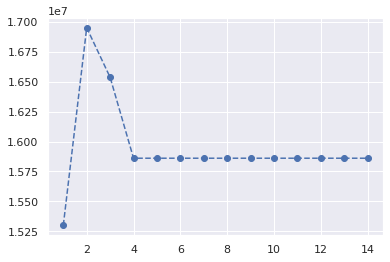

In [244]:
fig = plt.figure()
#plt.plot(n, r, '-')
plt.scatter(n,mse)
plt.plot(n, mse, '--')

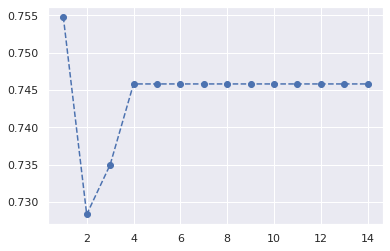

In [245]:
fig = plt.figure()
plt.plot(n, r, '--')
plt.scatter(n,r)
#plt.plot(n, r, '--')

In [246]:
n=list(range(1,5))
rsquare=[]
for i in n:
  from sklearn.pipeline import make_pipeline
  pcr = make_pipeline(StandardScaler(), PCA(n_components=i), LinearRegression())
  pcr.fit(x_train, y_train)
  rsquare.append(pcr.score(x_test, y_test))

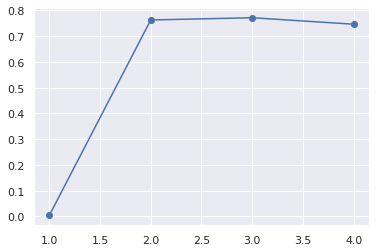

In [247]:
fig = plt.figure()
plt.plot(n, rsquare, '-')
plt.scatter(n,rsquare)

PCR and PLS Comparison

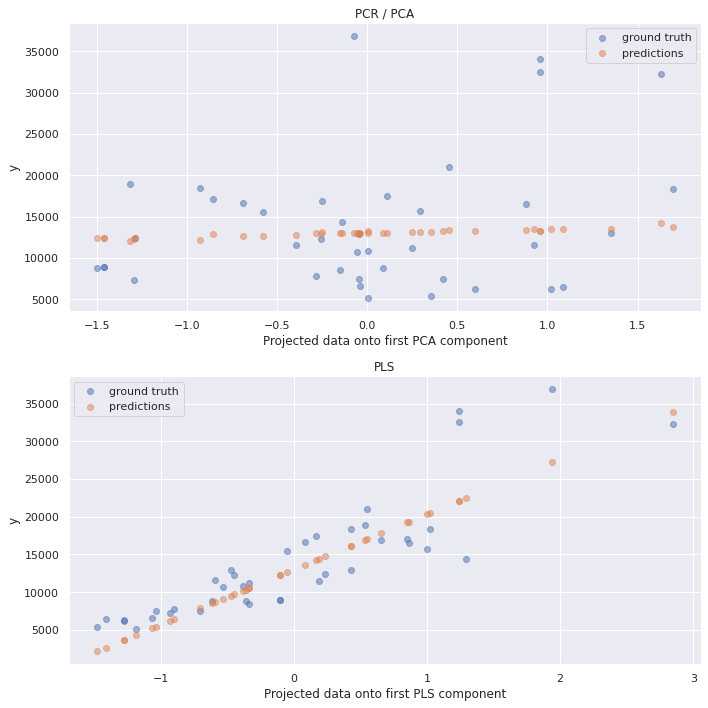

In [253]:
from sklearn.pipeline import make_pipeline
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(x_train, y_train)
pca = pcr.named_steps["pca"]
pls = PLSRegression(n_components=1)
#pls.fit(x_train_raw, y_train)
pls.fit(x_train, y_train)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].scatter(pca.transform(x_test), y_test, alpha=0.5, label="ground truth")
axes[0].scatter(
    pca.transform(x_test), pcr.predict(x_test), alpha=0.5, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(x_test), y_test, alpha=0.5, label="ground truth")
axes[1].scatter(
    pls.transform(x_test), pls.predict(x_test), alpha=0.5, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()